In [33]:
import pandas as pd

tsv_file='/Users/jurrienboogert/Documents/Data_Science_Society/thesis/thesis_spring_2023/data/NOAA/earthquakes-2023-03-22_09-45-09_+0100.tsv'
NOAA=pd.read_table(tsv_file,sep='\t')

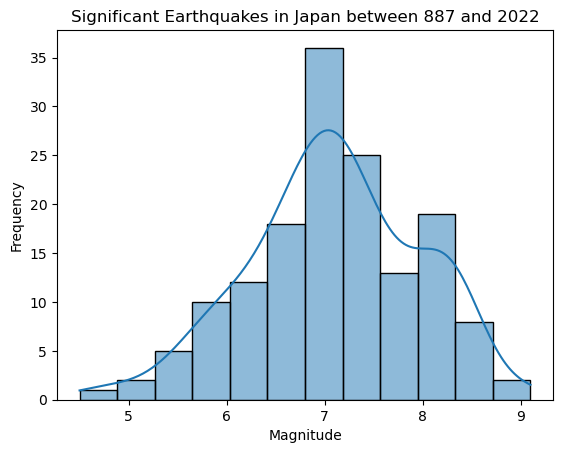

4.5 7.091390728476819


In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select area based on 134-174 Longitude and 10-60 Latitude
Japan_NOAA = NOAA[(NOAA.Longitude >= 134) & (NOAA.Longitude <= 174) & (NOAA.Latitude >= 10) & (NOAA.Latitude <= 60)]

deaths = Japan_NOAA.Deaths > 0
missing = Japan_NOAA.Missing > 0
injuries = Japan_NOAA.Injuries > 0
damage = Japan_NOAA['Damage ($Mil)'] > 0
houses_damaged = Japan_NOAA['Houses Damaged'] > 0
houses_destroyed = Japan_NOAA['Houses Destroyed'] > 0

total_death = Japan_NOAA['Total Deaths'] > 0
total_missing = Japan_NOAA['Total Missing'] > 0
total_injuries = Japan_NOAA['Total Injuries'] > 0
total_damage = Japan_NOAA['Total Damage ($Mil)'] > 0
total_houses_damaged = Japan_NOAA['Total Houses Damaged'] > 0
total_houses_destroyed = Japan_NOAA['Total Houses Destroyed'] > 0

Japan_NOAA_significant = Japan_NOAA[deaths | missing | injuries | damage | houses_damaged | total_death | total_missing | total_injuries | total_damage | houses_destroyed | total_houses_damaged | total_houses_destroyed]

sns.histplot(Japan_NOAA_significant.Mag, bins=12, log_scale=(False,False), kde=True)

plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.title('Significant Earthquakes in Japan between 887 and 2022')
plt.show()
print(Japan_NOAA_significant.Mag.min(), Japan_NOAA_significant.Mag.mean())

/var/folders/76/dx35v0xn2fb8zl1lq8cmvdg40000gn/T/ipykernel_4596/841767988.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = Japan_NOAA.groupby(pd.cut(Japan_NOAA.Mag, bins=bin_edges)).sum()


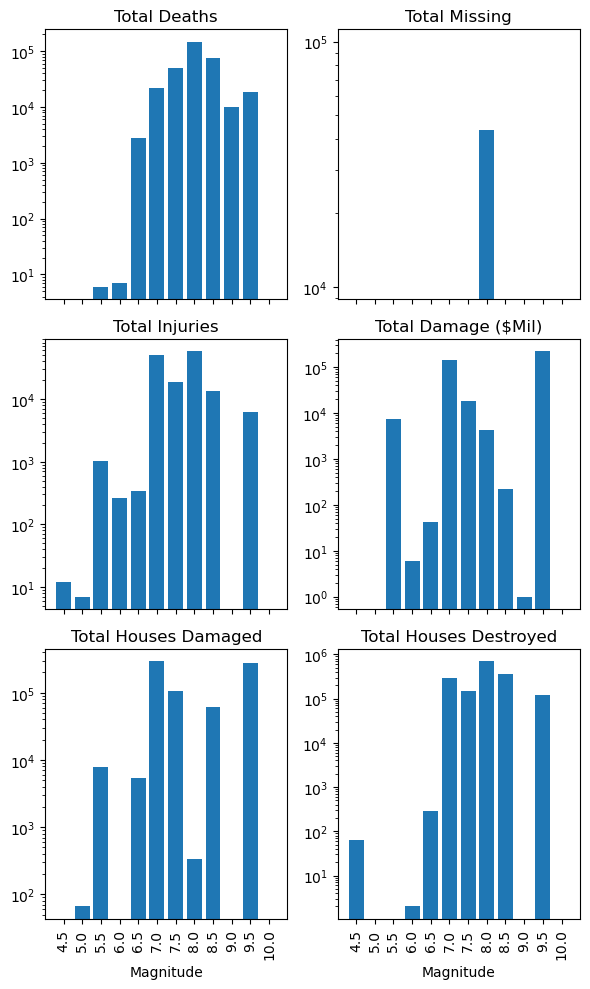

In [35]:
# Set the bin edges at half-step increments
bin_edges = [x/2 for x in range(8, 21)]
# Group the data by earthquake magnitude
grouped = Japan_NOAA.groupby(pd.cut(Japan_NOAA.Mag, bins=bin_edges)).sum()

# Extract the middle number from the magnitude range
magnitude_labels = [f'{x.left + 0.5:.1f}' for x in grouped.index]

# Create a 2x3 grid of subplots
fig, axs = plt.subplots(3, 2, figsize=(6, 10), sharex=True)

# Plot each earthquake statistic on a separate subplot
axs[0, 0].bar(magnitude_labels, grouped['Total Deaths'])
axs[0, 0].set_title('Total Deaths')
axs[0, 1].bar(magnitude_labels, grouped['Total Missing'])
axs[0, 1].set_title('Total Missing')
axs[1, 0].bar(magnitude_labels, grouped['Total Injuries'])
axs[1, 0].set_title('Total Injuries')
axs[1, 1].bar(magnitude_labels, grouped['Total Damage ($Mil)'])
axs[1, 1].set_title('Total Damage ($Mil)')
axs[2, 0].bar(magnitude_labels, grouped['Total Houses Damaged'])
axs[2, 0].set_title('Total Houses Damaged')
axs[2, 1].bar(magnitude_labels, grouped['Total Houses Destroyed'])
axs[2, 1].set_title('Total Houses Destroyed')

# Set the y-axis scale to logarithmic
for ax in axs.flat:
    ax.set_yscale('log')

# Set the chart title and axis labels
# fig.suptitle('Earthquake Statistics')
for i in range(2):
    axs[2, i].set(xlabel='Magnitude', ylabel='')
for i in range(2):
    axs[1, i].set(xlabel='', ylabel='')
for i in range(2):
    axs[0, i].set(xlabel='', ylabel='')

# Rotate the x-axis labels by 90 degrees
for ax in axs.flat:
    ax.tick_params(axis='x', rotation=90)
    
# Adjust the layout of the subplots
fig.tight_layout()

# Display the chart
plt.savefig('graphs/earthquake_statistics.png')
plt.show()